In [1]:
import pandas as pd
dataset1 = pd.read_excel('/content/known_data_set.xlsx') # Upload the DFT generated known data with features
print(dataset1.columns)

Index(['Cathode', 'Anode', 'Cations', 'CL', 'Anions', 'X', 'ECA', 'NC', 'NH',
       'NF', 'MWCA', 'ENCA', 'IPCA', 'EAN', 'EM4AN', 'HE', 'LE', 'µ',
       'Energy_of_EC', 'Energy_of_DMC', 'PS', 'ENS', 'MWS', 'PMAX', 'PMIN',
       'ESS', 'Energy_of_anion_intercalated_Cathode', 'Voltage'],
      dtype='object')

In [ ]:
df0 = dataset1.drop(['Cathode', 'Anode', 'Cations', 'Anions','Energy_of_EC','Energy_of_DMC','Energy_of_anion_intercalated_Cathode'
, 'ECA', 'EAN', 'EM4AN', 'ESS'], axis =1) # Drop the catagorical columns and some of the DFT generated features e.g.,  'Energy_of_EC','Energy_of_DMC' etc.
print(df0.columns)

Index(['CL', 'X', 'NC', 'NH', 'NF', 'MWCA', 'ENCA', 'IPCA', 'HE', 'LE', 'µ',
       'PS', 'ENS', 'MWS', 'PMAX', 'PMIN', 'Voltage'],
      dtype='object')

In [ ]:
# divided the dataset in x and y (x = features and y = target varibale (Voltage))
x=df0.drop(['Voltage'], axis=1)
y=df0['Voltage']

### Cross_validation

In [ ]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import ElasticNet, Lasso, Ridge,
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_decomposition import PLSRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#IMPORTING CROSS VALIDATION TOOLS
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# checking cross-validation performance with default parameters (K-fold CV, Repeated-K-Fold CV, and LOOCV)
abr = AdaBoostRegressor(random_state=42)
enr = ElasticNet(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
knr = KNeighborsRegressor()
krr = KernelRidge()
ls = Lasso(random_state=42)
pls = PLSRegression()
rfr = RandomForestRegressor(random_state=42)
rr = Ridge(random_state=42)
xgbr = XGBRegressor()
svr = SVR()
dtr = DecisionTreeRegressor(random_state=42)

models = {
    'ABR': abr,
    'ENR': enr,
    'GBR': gbr,
    'KNR': knr,
    'KRR': krr,
    'LS': ls,
    'PLS': pls,
    'RFR': rfr,
    'RR': rr,
    'XGBR': xgbr,
    'SVR': svr,
    'DTR': dtr
}

from sklearn.model_selection import cross_val_score, RepeatedKFold, LeaveOneOut, KFold
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

k_fold_mae = []
R_k_fold_mae = []
LOOCV_mae = []
k_r2 = []
R_k_r2 = []
Models = []

num_repetitions = 3
num_folds = 10

# Assuming you have already defined 'model' and 'train_x_norm' from the previous code

for model_name, model in models.items():
    Models.append(model_name)  # Append the model name
    cv = KFold(n_splits=10, random_state=None)
    k_mae_scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=None)
    k_r2_scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=None)
    k_fold_mae.append(round(-np.mean(k_mae_scores), 2))
    k_r2.append(round(np.mean(k_r2_scores), 2))


    # Repeated K-fold-CV
    rkf = RepeatedKFold(n_splits=num_folds, n_repeats=num_repetitions, random_state=None)
    rk_mae_scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=rkf, n_jobs=None)
    rk_r2_scores = cross_val_score(model, x, y, scoring='r2', cv=rkf, n_jobs=None)
    R_k_fold_mae.append(round(-np.mean(rk_mae_scores), 2))
    R_k_r2.append(round(np.mean(rk_r2_scores),2))

    # LOOCV
    loo = LeaveOneOut()
    loocv_mae_scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=loo, n_jobs=None)
    LOOCV_mae.append(round(-np.mean(loocv_mae_scores), 2))


# create DataFrame
cv_df = pd.DataFrame({'ML Models': Models,
                      'K-Fold-MAE (V)': k_fold_mae,
                      'R-K-Fold-MAE (V)': R_k_fold_mae,
                      'LOOCV-MAE (V)': LOOCV_mae,
                      'K-Fold-R2': k_r2,
                      'R-K-Fold-R2': R_k_r2})


cv_df.to_excel('default_CV_df.xlsx', index=False)
print(cv_df)

,ML Models,K-Fold-MAE (V),R-K-Fold-MAE (V),LOOCV-MAE (V),K-Fold-R2,R-K-Fold-R2
0,ABR,0.47,0.33,0.32,0.16,0.86
1,ENR,0.96,0.90,0.90,-1.60,0.02
2,GBR,0.39,0.16,0.16,0.42,0.96
3,KNR,0.55,0.52,0.48,0.02,0.60
4,KRR,0.49,0.45,0.44,0.16,0.73
5,LS,0.96,0.90,0.90,-1.61,0.01
6,PLS,0.50,0.48,0.48,0.14,0.70
7,RFR,0.42,0.12,0.12,0.29,0.97
8,RR,0.49,0.45,0.44,0.16,0.73
9,XGBR,0.35,0.05,0.04,0.40,1.00


We have choosen GBR, RFR, XGBR, DTR ML models for hyperparameter tuning as these models are showing less error in voltage prediction compared to other ML models

### Data Leakage Analysis

In [2]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

df = pd.read_excel('known_data_set.xlsx')
df1 = df.drop(['Cathode', 'Anode', 'Cations', 'Anions','Energy_of_EC','Energy_of_DMC','Energy_of_anion_intercalated_Cathode', 'ECA', 'EAN', 'EM4AN', 'ESS'], axis =1)
x = df1.drop(['Voltage'], axis=1)
y = df1['Voltage']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # divided the dataset into 80% train and 20% test

In [3]:
# Count the number of duplicated rows
num_duplicates = df1.duplicated().sum()
print(f"Number of duplicated rows in df1: {num_duplicates}")

Number of duplicated rows in df1: 0


In [4]:
# Combine x and y back to compare full rows
train_data = x_train.copy()
train_data['target'] = y_train.values

test_data = x_test.copy()
test_data['target'] = y_test.values

# Check for overlap
leakage_rows = pd.merge(train_data, test_data, on=list(train_data.columns), how='inner')
print(f"Number of overlapping rows between train and test sets: {len(leakage_rows)}")


Number of overlapping rows between train and test sets: 0


In [5]:
# Check overlap in just the feature space
common_features = pd.merge(x_train, x_test, how='inner')
print(f"Number of overlapping feature rows between train and test sets: {len(common_features)}")

Number of overlapping feature rows between train and test sets: 0


From the above analysis it is clear that there is no such data sample which is present both in training and testing set and thus avoding data leakage

### XGBR_hyperparameter_tuning

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

df = pd.read_excel('known_data_set.xlsx')
df1 = df.drop(['Cathode', 'Anode', 'Cations', 'Anions','Energy_of_EC','Energy_of_DMC','Energy_of_anion_intercalated_Cathode', 'ECA', 'EAN', 'EM4AN', 'ESS'], axis =1)
x = df1.drop(['Voltage'], axis=1)
y = df1['Voltage']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # divided the dataset into 80% train and 20% test

# Define the model
xgb = XGBRegressor(objective="reg:squarederror", random_state=42) # fixed the random state for the reproducibility of the XGBR predicted result

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
	  'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7]
}


# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Use all available cores
)

# Perform the grid search
grid_search.fit(x_train, y_train)

# Get the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
train_pred = best_model.predict(x_train)
y_pred = best_model.predict(x_test)
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, y_pred)

train_R2 = r2_score(y_train, train_pred)
test_R2 = r2_score(y_test, y_pred)
print(f"Test MAE: {test_mae}")
print(f"Train MAE: {train_mae}")
print(f"Test R2: {test_R2}")
print(f"Train R2: {train_R2}")

### GBR_hyperparameter_tuning

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
import pandas as pd

df = pd.read_excel('known_data_set.xlsx')
df1 = df.drop(['Cathode', 'Anode', 'Cations', 'Anions','Energy_of_EC','Energy_of_DMC','Energy_of_anion_intercalated_Cathode', 'ECA', 'EAN', 'EM4AN', 'ESS'], axis =1)
x = df1.drop(['Voltage'], axis=1)
y = df1['Voltage']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the model
gbr=GradientBoostingRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1.0],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'max_features': [0.5, 0.7, 1.0]
}
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,  # 5-fold cross-validation
)

# Perform the grid search
grid_search.fit(x_train, y_train)

# Get the best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", -grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
train_pred = best_model.predict(x_train)
train_mae = mean_absolute_error(y_train, train_pred)
y_pred = best_model.predict(x_test)
test_mae = mean_absolute_error(y_test, y_pred)
train_R2 = r2_score(y_train, train_pred)
test_R2 = r2_score(y_test, y_pred)
print(f"Test MAE: {test_mae}")
print(f"Traint MAE: {train_mae}")
print(f"Test R2: {test_R2}")
print(f"Train R2: {train_R2}")

Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 1.0, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.7}
Best cross-validation score:  0.04635427751608971
Test MAE: 0.03862409908166959
Traint MAE: 0.0179128302068933
Test R2: 0.9973984776030778
Train R2: 0.999537590352009


### Parity Plot for XGBR

In [ ]:
import pandas as pd
df=pd.read_excel('/content/known_data_set.xlsx')
from sklearn.model_selection import train_test_split
x=df.drop(['Voltage'],axis=1)
y=df['Voltage']
x_train_a, x_test_a, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train_a.drop(['Cathode', 'Anode', 'Cations', 'Anions','Energy_of_EC','Energy_of_DMC','Energy_of_anion_intercalated_Cathode', 'ECA', 'EAN', 'EM4AN', 'ESS'], axis=1)
x_test = x_test_a.drop(['Cathode', 'Anode', 'Cations', 'Anions','Energy_of_EC','Energy_of_DMC','Energy_of_anion_intercalated_Cathode', 'ECA', 'EAN', 'EM4AN', 'ESS'], axis=1)
from xgboost import XGBRegressor
xgbr=XGBRegressor(learning_rate = 0.2, max_depth = 3, min_child_weight = 7, n_estimators = 500, random_state = 42)
xgbr.fit(x_train, y_train)
train_pred=xgbr.predict(x_train)
test_pred=xgbr.predict(x_test)
from sklearn.metrics import mean_absolute_error, r2_score
train_mae=mean_absolute_error(train_pred, y_train)
test_mae=mean_absolute_error(test_pred, y_test)
test_r2 = r2_score(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
train_mae, test_mae, train_r2, test_r2

(0.012522513621145759,
 0.020549310698823292,
 0.9997593391492781,
 0.9992098963201697)

In [ ]:
x_train_a['Anions'].unique()

array(['TFSI', 'Otf', 'FSI-CH3', 'BF4', 'ClO4', 'FTFSI', 'CH3-SO4', 'FSI',
       'PF6'], dtype=object)

In [ ]:
x_test_a['Anions'].unique()

array(['FSI', 'Otf', 'ClO4', 'PF6', 'FSI-CH3', 'TFSI', 'CH3-SO4', 'FTFSI',
       'BF4'], dtype=object)

In [ ]:
x_train_a['Voltage']=y_train
x_train_a['ML_predicted_voltage(V)']=train_pred
x_test_a['Voltage']=y_test
x_test_a['ML_predicted_voltage(V)']=test_pred

In [ ]:
Anions=list(x_train_a['Anions'].unique())
len(Anions), Anions

(9,
 ['TFSI', 'Otf', 'FSI-CH3', 'BF4', 'ClO4', 'FTFSI', 'CH3-SO4', 'FSI', 'PF6'])

In [ ]:
True_train_values= {}
for a in x_train_a['Anions'].unique():
  voltage_values=x_train_a.loc[x_train_a['Anions']==a,'Voltage'].tolist()
  True_train_values[a]=voltage_values
  True_train_values.keys()
  final_True_train_values = dict(zip(Anions, list(True_train_values.values())))

In [ ]:
True_train_ML_values={}
for a in x_train_a['Anions'].unique():
  voltage_values=x_train_a.loc[x_train_a['Anions']==a, 'ML_predicted_voltage(V)'].tolist()
  True_train_ML_values[a]=voltage_values
  True_train_ML_values.keys()
  final_True_train_ML_values= dict(zip(Anions, list(True_train_ML_values.values())))

In [ ]:
Anion_Train = list(final_True_train_values.keys())
Anion_Train

['TFSI', 'Otf', 'FSI-CH3', 'BF4', 'ClO4', 'FTFSI', 'CH3-SO4', 'FSI', 'PF6']

In [ ]:
True_test_values={}
for a in x_test_a['Anions'].unique():
  voltage_values=x_test_a.loc[x_test_a['Anions']==a, 'Voltage'].tolist()
  True_test_values[a]=voltage_values
  True_test_values.keys()
  final_True_test_values=dict(zip(Anions,list(True_test_values.values())))

In [ ]:
True_test_ML_values={}
for a in x_test_a['Anions'].unique():
  voltage_values=x_test_a.loc[x_test_a['Anions']==a, 'ML_predicted_voltage(V)'].tolist()
  True_test_ML_values[a]=voltage_values
  True_test_ML_values.keys()
  final_true_test_ML_values=dict(zip(Anions,list(True_test_ML_values.values())))

In [ ]:
anion_test = list(final_True_test_values.keys())
anion_test

['TFSI', 'Otf', 'FSI-CH3', 'BF4', 'ClO4', 'FTFSI', 'CH3-SO4', 'FSI', 'PF6']

In [ ]:
import numpy as np
regression_line = np.polyfit(y_train, train_pred, 1)
regression_fn = np.poly1d(regression_line)
regression_fn

poly1d([9.99527204e-01, 8.87968235e-04])

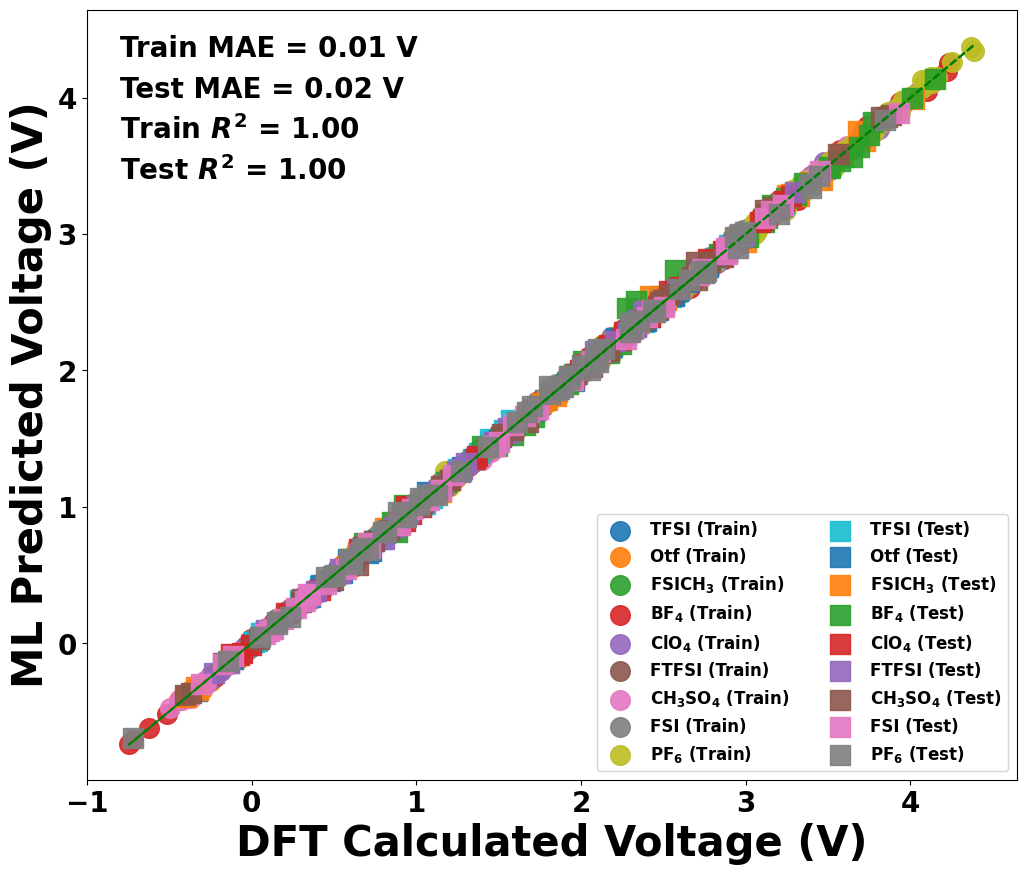

In [ ]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Set font weight for the plot
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Function to format chemical formulas: remove hyphens and add subscripts
def format_chemical_formula(formula):
    # Remove hyphens
    formula_no_hyphen = formula.replace('-', '')
    # Replace digits with LaTeX-style subscripts
    return re.sub(r'(\d+)', r'$_{\1}$', formula_no_hyphen)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot true train values
for j in Anion_Train:
    formatted_label = f'{format_chemical_formula(j)} (Train)'
    ax.scatter(
        final_True_train_values[j],
        True_train_ML_values[j],
        label=formatted_label,
        alpha=0.9,
        s=200
    )

# Plot true test values
for j in anion_test:
    formatted_label = f'{format_chemical_formula(j)} (Test)'
    ax.scatter(
        final_True_test_values[j],
        final_true_test_ML_values[j],
        label=formatted_label,
        alpha=0.9,
        marker='s',
        s=200
    )

# Add labels and title
ax.set_xlabel('DFT Calculated Voltage (V)', fontsize=30)
ax.set_ylabel('ML Predicted Voltage (V)', fontsize=30)

# Customize ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add legend
ax.legend(fontsize=12, loc='lower right', ncol=2)

# Plot regression line
plt.plot(y_train, regression_fn(y_train), color='green', linestyle='--', label='Regression Line')

# Add text annotations
plt.text(-0.8, 4.3,"Train MAE = 0.01 V", weight='bold', fontsize = 20)
plt.text(-0.8, 4.0,"Test MAE = 0.02 V", weight='bold', fontsize = 20)
plt.text(-0.8, 3.7, "Train $R^2$ = 1.00", weight='bold', fontsize = 20)
plt.text(-0.8, 3.4, "Test $R^2$ = 1.00", weight='bold', fontsize = 20)

# Show the plot
plt.show()

# Save the figure
# fig.savefig('gbr_scatter_voltage.png', dpi=700, bbox_inches="tight", transparent=True)

### Parity plot for GBR

In [ ]:
import pandas as pd
df=pd.read_excel('/content/known_data_set.xlsx')
from sklearn.model_selection import train_test_split
x=df.drop(['Voltage'],axis=1)
y=df['Voltage']
x_train_a, x_test_a, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train = x_train_a.drop(['Cathode', 'Anode', 'Cations', 'Anions','Energy_of_EC','Energy_of_DMC','Energy_of_anion_intercalated_Cathode'
, 'ECA', 'EAN', 'EM4AN', 'ESS'], axis=1)
x_test = x_test_a.drop(['Cathode', 'Anode', 'Cations', 'Anions','Energy_of_EC','Energy_of_DMC','Energy_of_anion_intercalated_Cathode'
, 'ECA', 'EAN', 'EM4AN', 'ESS'], axis=1)
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
gbr=GradientBoostingRegressor(learning_rate = 0.1, max_depth = 5, max_features = 1.0, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 200, subsample = 0.7,
                              random_state = 42)
gbr.fit(x_train, y_train)
# make prediction with best parameters for a particular value of i
train_pred = gbr.predict(x_train)
test_pred = gbr.predict(x_test)

gbr_best_MAE_train = mean_absolute_error(y_train, train_pred)
gbr_best_MAE_test = mean_absolute_error(y_test, test_pred)


gbr_best_r2_train = r2_score(y_train, train_pred)
gbr_best_r2_test = r2_score(y_test, test_pred)
print(gbr_best_MAE_train,gbr_best_MAE_test,gbr_best_r2_train,gbr_best_r2_test)

0.01964436839794715 0.038362516145163256 0.9994466990834783 0.9975705971961228


In [ ]:
x_train_a['Anions'].unique()

array(['TFSI', 'Otf', 'FSI-CH3', 'BF4', 'ClO4', 'FTFSI', 'CH3-SO4', 'FSI',
       'PF6'], dtype=object)

In [ ]:
x_test_a['Anions'].unique()

array(['FSI', 'Otf', 'ClO4', 'PF6', 'FSI-CH3', 'TFSI', 'CH3-SO4', 'FTFSI',
       'BF4'], dtype=object)

In [ ]:
x_train_a['Voltage']=y_train
x_train_a['ML_predicted_voltage(V)']=train_pred
x_test_a['Voltage']=y_test
x_test_a['ML_predicted_voltage(V)']=test_pred

In [ ]:
Anions=list(x_train_a['Anions'].unique())
len(Anions), Anions

(9,
 ['TFSI', 'Otf', 'FSI-CH3', 'BF4', 'ClO4', 'FTFSI', 'CH3-SO4', 'FSI', 'PF6'])

In [ ]:
True_train_values= {}
for a in x_train_a['Anions'].unique():
  voltage_values=x_train_a.loc[x_train_a['Anions']==a,'Voltage'].tolist()
  True_train_values[a]=voltage_values
  True_train_values.keys()
  final_True_train_values = dict(zip(Anions, list(True_train_values.values())))

In [ ]:
True_train_ML_values={}
for a in x_train_a['Anions'].unique():
  voltage_values=x_train_a.loc[x_train_a['Anions']==a, 'ML_predicted_voltage(V)'].tolist()
  True_train_ML_values[a]=voltage_values
  True_train_ML_values.keys()
  final_True_train_ML_values= dict(zip(Anions, list(True_train_ML_values.values())))

In [ ]:
Anion_Train = list(final_True_train_values.keys())
Anion_Train

['TFSI', 'Otf', 'FSI-CH3', 'BF4', 'ClO4', 'FTFSI', 'CH3-SO4', 'FSI', 'PF6']

In [ ]:
True_test_values={}
for a in x_test_a['Anions'].unique():
  voltage_values=x_test_a.loc[x_test_a['Anions']==a, 'Voltage'].tolist()
  True_test_values[a]=voltage_values
  True_test_values.keys()
  final_True_test_values=dict(zip(Anions,list(True_test_values.values())))

In [ ]:
True_test_ML_values={}
for a in x_test_a['Anions'].unique():
  voltage_values=x_test_a.loc[x_test_a['Anions']==a, 'ML_predicted_voltage(V)'].tolist()
  True_test_ML_values[a]=voltage_values
  True_test_ML_values.keys()
  final_true_test_ML_values=dict(zip(Anions,list(True_test_ML_values.values())))
final_true_test_ML_values

In [ ]:
anion_test = list(final_True_test_values.keys())
anion_test

['TFSI', 'Otf', 'FSI-CH3', 'BF4', 'ClO4', 'FTFSI', 'CH3-SO4', 'FSI', 'PF6']

In [ ]:
import numpy as np
regression_line = np.polyfit(y_train, train_pred, 1)
regression_fn = np.poly1d(regression_line)
regression_fn

poly1d([0.99826028, 0.00322085])

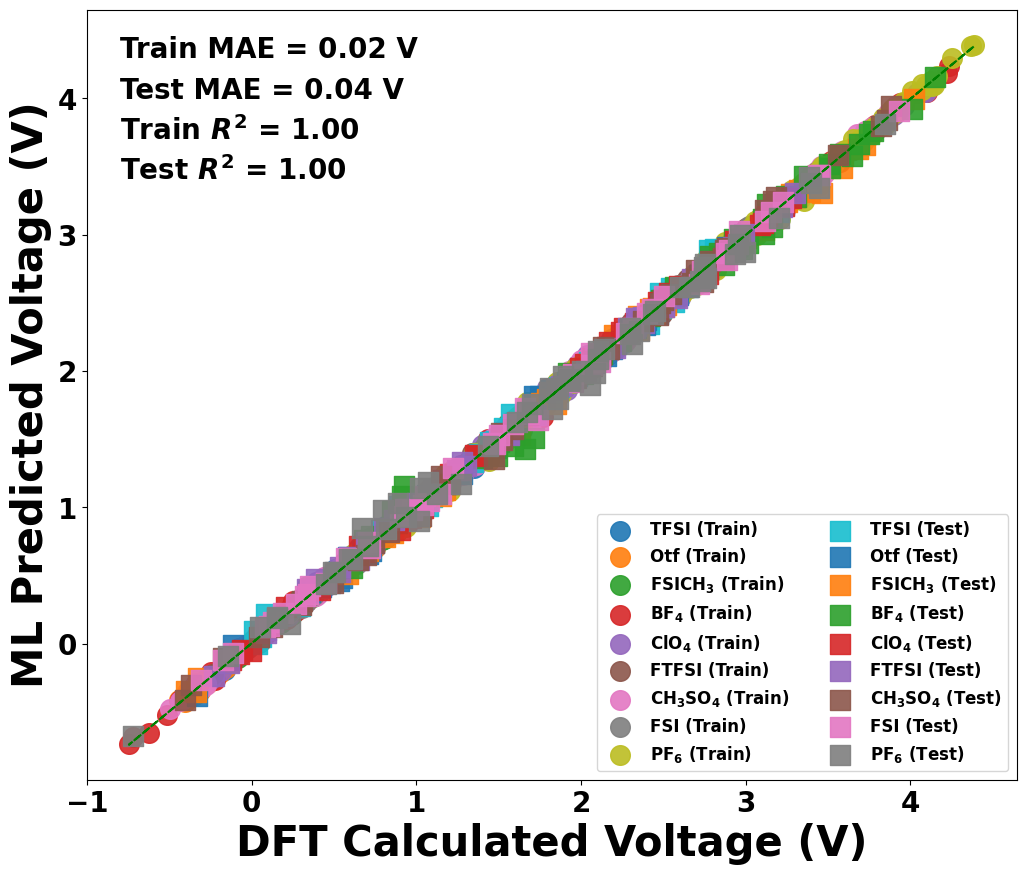

In [ ]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Set font weight for the plot
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

# Function to format chemical formulas: remove hyphens and add subscripts
def format_chemical_formula(formula):
    # Remove hyphens
    formula_no_hyphen = formula.replace('-', '')
    # Replace digits with LaTeX-style subscripts
    return re.sub(r'(\d+)', r'$_{\1}$', formula_no_hyphen)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot true train values
for j in Anion_Train:
    formatted_label = f'{format_chemical_formula(j)} (Train)'
    ax.scatter(
        final_True_train_values[j],
        True_train_ML_values[j],
        label=formatted_label,
        alpha=0.9,
        s=200
    )

# Plot true test values
for j in anion_test:
    formatted_label = f'{format_chemical_formula(j)} (Test)'
    ax.scatter(
        final_True_test_values[j],
        final_true_test_ML_values[j],
        label=formatted_label,
        alpha=0.9,
        marker='s',
        s=200
    )

# Add labels and title
ax.set_xlabel('DFT Calculated Voltage (V)', fontsize=30)
ax.set_ylabel('ML Predicted Voltage (V)', fontsize=30)

# Customize ticks
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Add legend
ax.legend(fontsize=12, loc='lower right', ncol=2)

# Plot regression line
plt.plot(y_train, regression_fn(y_train), color='green', linestyle='--', label='Regression Line')

# Add text annotations
plt.text(-0.8, 4.3, "Train MAE = 0.02 V", weight='bold', fontsize=20)
plt.text(-0.8, 4.0, "Test MAE = 0.04 V", weight='bold', fontsize=20)
plt.text(-0.8, 3.7, "Train $R^2$ = 1.00", weight='bold', fontsize=20)
plt.text(-0.8, 3.4, "Test $R^2$ = 1.00", weight='bold', fontsize=20)

# Show the plot
plt.show()

# Save the figure
# fig.savefig('gbr_scatter_voltage.png', dpi=700, bbox_inches="tight", transparent=True)

### Prediction for Unknown dataset

In [6]:
import pandas as pd
df0=pd.read_excel('/content/known_data_set.xlsx')
df=df0.drop(['Cathode', 'Anode', 'Cations', 'Anions','Energy_of_EC','Energy_of_DMC','Energy_of_anion_intercalated_Cathode', 'ECA', 'EAN', 'EM4AN', 'ESS'], axis=1)
x=df.drop(['Voltage'], axis=1)
y=df['Voltage']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)
from xgboost import XGBRegressor
xgbr=XGBRegressor(learning_rate = 0.2, max_depth = 3, min_child_weight = 7, n_estimators = 500)
xgbr.fit(x_train, y_train)
train_pred=xgbr.predict(x_train)
test_pred=xgbr.predict(x_test)
from sklearn.metrics import mean_absolute_error
test_mae = mean_absolute_error(y_test,test_pred)
train_mae = mean_absolute_error(y_train, train_pred)
test_mae, train_mae

(0.020549310698823292, 0.012522513621145759)

In [7]:
# Prediction of volatge for unknown systems
unknown_df = pd.read_excel('/content/Unknown_data_set.xlsx')
unknown_df1 = unknown_df.drop(['Cathode', 'Anode', 'Cations', 'Anions'], axis =1)

In [8]:
# Check for overlap
leakage_rows = pd.merge(x, unknown_df1, on=list(x.columns), how='inner')
print(f"Number of overlapping rows between known and unknown sets: {len(leakage_rows)}")

Number of overlapping rows between known and unknown sets: 0


In [ ]:
# Prediction of volatge for unknown systems
unknown_pred = xgbr.predict(unknown_df1)
unknown_df['ML_predicted_voltage (V)'] = unknown_pred
print(unknown_df)

,Cathode,Anode,Cations,CL,Anions,X,NC,NH,NF,MWCA,...,IPCA,HE,LE,µ,PS,ENS,MWS,PMAX,PMIN,ML_predicted_voltage (V)
0,DFTh,1,K,1,BF4,1,48,24,8,252.310,...,272.274,-0.2063,-0.04449,1.8511,48.936,18.78,125.902912,0.673213,-0.418303,2.469496
1,DFTh,1,K,1,BF4,2,48,24,8,252.310,...,272.274,-0.2063,-0.04449,1.8511,48.936,18.78,125.902912,0.673213,-0.418303,2.016442
2,DFTh,1,K,1,BF4,3,48,24,8,252.310,...,272.274,-0.2063,-0.04449,1.8511,48.936,18.78,125.902912,0.673213,-0.418303,2.352230
3,DFTh,1,K,1,CH3-SO4,2,48,24,8,252.310,...,272.274,-0.2063,-0.04449,1.8511,53.372,26.31,150.196720,0.396582,-0.263536,1.875890
4,DFTh,1,K,1,CH3-SO4,3,48,24,8,252.310,...,272.274,-0.2063,-0.04449,1.8511,53.372,26.31,150.196720,0.396582,-0.263536,1.925493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6556,Th,27,Na,3,PF6,2,48,32,0,216.329,...,264.624,-0.1871,-0.05755,0.0015,31.004,27.00,167.953948,0.623000,-0.104000,3.212072
6557,Th,27,Na,3,PF6,4,48,32,0,216.329,...,264.624,-0.1871,-0.05755,0.0015,31.004,27.00,167.953948,0.623000,-0.104000,3.318505
6558,Th,27,Na,3,TFSI,2,48,32,0,216.329,...,264.624,-0.1871,-0.05755,0.0015,41.076,51.87,303.138526,0.480290,-0.420675,2.393490
6559,Th,27,Na,3,TFSI,3,48,32,0,216.329,...,264.624,-0.1871,-0.05755,0.0015,41.076,51.87,303.138526,0.480290,-0.420675,2.478343


The DFT validation has been carried out on the systems belongs to unknown dataset and not present neither in train nor in test set